## Retail Sales Data Cleaning & Reporting

##### This notebook cleans and analyzes the **Snitch Fashion Sales** dataset.  
##### The focus is on fixing data-quality issues, preparing a clean subset of valid sales, and then using it for reporting and basic business insights.

## 1. Importing Required Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Loading the Raw Dataset

##### Here I load the raw uncleaned CSV file (`Snitch_Fashion_Sales_Uncleaned.csv`) into a pandas DataFrame called `uncleaned_data` 
##### and preview the first few rows to understand the structure.


In [5]:
uncleaned_data=pd.read_csv("Snitch_Fashion_Sales_Uncleaned.csv")
uncleaned_data.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,NaN,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,NaN,NaN,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,NaN,0.00,02-01-2025,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,NaN,0.00,18-06-2025,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaN,hyderbad,NaN,63.66


## 3. Initial Data Audit: To understand the overall quality of the dataset

In [7]:
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Customer_Name     2500 non-null   object 
 2   Product_Category  2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Units_Sold        1194 non-null   float64
 5   Unit_Price        1290 non-null   float64
 6   Discount_%        849 non-null    float64
 7   Sales_Amount      2500 non-null   float64
 8   Order_Date        1894 non-null   object 
 9   City              2500 non-null   object 
 10  Segment           1679 non-null   object 
 11  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 234.5+ KB


In [8]:
uncleaned_data.shape

(2500, 12)

In [9]:
uncleaned_data.isnull().sum()

Order_ID               0
Customer_Name          0
Product_Category       0
Product_Name           0
Units_Sold          1306
Unit_Price          1210
Discount_%          1651
Sales_Amount           0
Order_Date           606
City                   0
Segment              821
Profit                 0
dtype: int64

## 4. Creating a Working Copy & Fixing Basic Types

In [11]:
df = uncleaned_data.copy()
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")
df["Order_ID"] = df["Order_ID"].astype(str)
df.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,NaN,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,NaN,NaN,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,NaN,0.00,NaT,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,NaN,0.00,NaT,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaT,hyderbad,NaN,63.66


## 5. Handling Missing Discount Values

In [13]:
df["Discount_%"] = df["Discount_%"].fillna(0)
df.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,NaN,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,NaN,0.00,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,0.00,0.00,NaT,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,0.00,0.00,NaT,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaT,hyderbad,NaN,63.66


## 6. Recovering Missing Unit_Price from Existing Data

In [15]:
mask = df["Unit_Price"].isnull() & df["Units_Sold"].notnull()
df.loc[mask, "Unit_Price"] = df.loc[mask, "Sales_Amount"] / df.loc[mask, "Units_Sold"]
df.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,NaN,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,0.00,0.00,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,0.00,0.00,NaT,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,0.00,0.00,NaT,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaT,hyderbad,NaN,63.66


## 7. Recovering Missing Units_Sold from Existing Data

In [17]:
mask2 = df["Units_Sold"].isnull() & df["Unit_Price"].notnull()
df.loc[mask2, "Units_Sold"] = df.loc[mask2, "Sales_Amount"] / df.loc[mask2, "Unit_Price"]
df.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,0.0,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,0.00,0.00,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,0.00,0.00,NaT,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,0.00,0.00,NaT,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaT,hyderbad,NaN,63.66


In [18]:
df["Units_Sold"].fillna(df["Units_Sold"].median(), inplace=True)
df["Unit_Price"].fillna(df["Unit_Price"].median(), inplace=True)
df.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,0.0,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,0.00,0.00,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,0.00,0.00,NaT,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,0.00,0.00,NaT,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaT,hyderbad,NaN,63.66


In [19]:
df.isnull().sum()

Order_ID               0
Customer_Name          0
Product_Category       0
Product_Name           0
Units_Sold             0
Unit_Price             0
Discount_%             0
Sales_Amount           0
Order_Date          1872
City                   0
Segment              821
Profit                 0
dtype: int64

## 8. Classifying Records: Valid Sales vs Refunds vs Pending

In [21]:
valid_sales = df[(df["Units_Sold"] > 0) & (df["Unit_Price"] > 0) & (df["Sales_Amount"] > 0)]
refunds = df[(df["Units_Sold"] < 0) | (df["Sales_Amount"] < 0)]
pending = df[(df["Units_Sold"] == 0) | (df["Order_Date"].isnull())]
valid_sales.head(10)

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaT,hyderbad,NaN,63.66
81,1081,Mary Lin,Jeans,Boyfriend Jeans,6.0,4798.06,0.81,5469.79,NaT,Hyd,B2B,-361.78
114,1114,Robert Williams,Dresses,Bodycon,6.0,568.61,0.20,2729.33,NaT,Delhi,B2C,-689.16
127,1127,Rhonda Ray,Dresses,Bodycon,3.0,4843.44,0.07,13513.20,NaT,Ahmedabad,B2B,2881.91
135,1135,Ronald Ballard,Shoes,Sneakers,4.0,1556.96,0.84,996.45,2024-10-23,Mumbai,B2B,1432.84
151,1151,Joseph Allen,Jeans,Straight Cut,4.0,2266.44,0.33,6074.06,NaT,Pune,B2C,-655.45
174,1174,Tiffany Flores,Jackets,Leather Jacket,6.0,4984.65,0.42,17346.58,NaT,Bangalore,NaN,2931.32
188,1188,Maria Morrow,Accessories,Belts,6.0,4910.28,0.12,25926.28,NaT,Bangalore,NaN,2089.25
218,1218,Jamie Alexander,Dresses,Wrap Dress,3.0,1544.45,0.33,3104.34,NaT,Hyd,B2B,707.56
251,1251,Hailey Sullivan,Dresses,Casual Midi,2.0,4841.40,0.60,3873.12,NaT,Pune,NaN,578.37


## 9. Recomputing Sales_Amount for Valid Sales

In [23]:
valid_sales["Sales_Amount"] = valid_sales["Units_Sold"] * valid_sales["Unit_Price"] * (1 - valid_sales["Discount_%"]/100)

## 10. Cleaning Dates and Sorting Transactions

In [25]:
valid_sales = valid_sales.dropna(subset=["Order_Date"])

In [26]:
valid_sales = valid_sales.sort_values("Order_Date").reset_index(drop=True)

In [27]:
valid_sales.shape, refunds.shape, pending.shape

((24, 12), (312, 12), (2232, 12))

In [28]:
valid_sales.head(10)

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1816,Danielle Love,T-Shirts,Graphic Tee,1.0,1130.83,0.84,1121.331028,2023-07-28,Hyderabad,NaN,-804.96
1,1720,Dylan Armstrong,Jackets,Leather Jacket,3.0,3667.54,0.57,10939.905066,2023-07-31,Ahmedabad,B2B,459.43
2,1615,Joel Fitzpatrick,Dresses,Casual Midi,6.0,4962.70,0.02,29770.244760,2023-08-04,Hyd,B2C,61.60
3,2522,Russell King,Dresses,Wrap Dress,4.0,2847.02,0.57,11323.167944,2023-09-02,Pune,NaN,1592.04
4,2640,Richard Lopez,Jackets,Leather Jacket,6.0,4720.23,0.69,28125.962478,2023-12-29,Ahmedabad,B2B,2243.09
5,2820,Stephanie Johnson,Accessories,Caps,1.0,2454.71,0.10,2452.255290,2024-01-03,Mumbai,B2B,2850.37
6,1741,Jennifer Dominguez,T-Shirts,Graphic Tee,1.0,1762.56,0.98,1745.286912,2024-01-13,Ahmedabad,B2B,1217.93
7,1018,Thomas Cole,Dresses,Maxi Dress,1.0,2847.86,0.70,2827.924980,2024-03-09,Delhi,B2C,2190.67
8,1487,Nancy Taylor,Accessories,Sunglasses,6.0,1234.08,0.71,7351.908192,2024-03-15,Delhi,B2C,-849.81
9,1628,Gary Simon,Dresses,Bodycon,1.0,3345.58,0.26,3336.881492,2024-04-15,Hyd,NaN,2274.54


## 11. Handling Segment & Feature Engineering

In [30]:
valid_sales["Segment"] = valid_sales["Segment"].fillna("Unknown")
valid_sales["Order_Date"] = pd.to_datetime(valid_sales["Order_Date"])
valid_sales = valid_sales.sort_values("Order_Date").reset_index(drop=True)
valid_sales["Year"] = valid_sales["Order_Date"].dt.year
valid_sales["Month"] = valid_sales["Order_Date"].dt.month_name()
valid_sales["Weekday"] = valid_sales["Order_Date"].dt.day_name()
valid_sales["Revenue_per_Unit"] = valid_sales["Sales_Amount"] / valid_sales["Units_Sold"]
# valid_sales.to_csv("cleaned_clothing_sales.csv", index=False)
# valid_sales.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=False)
# valid_sales.groupby("Product_Name")["Units_Sold"].sum().sort_values(ascending=False)
# valid_sales.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False)
# valid_sales.groupby("City")["Sales_Amount"].sum().sort_values(ascending=False)
# valid_sales.groupby("Month")["Sales_Amount"].sum().sort_values(ascending=False)
valid_sales.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit,Year,Month,Weekday,Revenue_per_Unit
0,1816,Danielle Love,T-Shirts,Graphic Tee,1.0,1130.83,0.84,1121.331028,2023-07-28,Hyderabad,Unknown,-804.96,2023,July,Friday,1121.331028
1,1720,Dylan Armstrong,Jackets,Leather Jacket,3.0,3667.54,0.57,10939.905066,2023-07-31,Ahmedabad,B2B,459.43,2023,July,Monday,3646.635022
2,1615,Joel Fitzpatrick,Dresses,Casual Midi,6.0,4962.70,0.02,29770.244760,2023-08-04,Hyd,B2C,61.60,2023,August,Friday,4961.707460
3,2522,Russell King,Dresses,Wrap Dress,4.0,2847.02,0.57,11323.167944,2023-09-02,Pune,Unknown,1592.04,2023,September,Saturday,2830.791986
4,2640,Richard Lopez,Jackets,Leather Jacket,6.0,4720.23,0.69,28125.962478,2023-12-29,Ahmedabad,B2B,2243.09,2023,December,Friday,4687.660413


In [31]:
valid_sales.info()
valid_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          24 non-null     object        
 1   Customer_Name     24 non-null     object        
 2   Product_Category  24 non-null     object        
 3   Product_Name      24 non-null     object        
 4   Units_Sold        24 non-null     float64       
 5   Unit_Price        24 non-null     float64       
 6   Discount_%        24 non-null     float64       
 7   Sales_Amount      24 non-null     float64       
 8   Order_Date        24 non-null     datetime64[ns]
 9   City              24 non-null     object        
 10  Segment           24 non-null     object        
 11  Profit            24 non-null     float64       
 12  Year              24 non-null     int32         
 13  Month             24 non-null     object        
 14  Weekday           24 non-nul

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit,Year,Month,Weekday,Revenue_per_Unit
0,1816,Danielle Love,T-Shirts,Graphic Tee,1.0,1130.83,0.84,1121.331028,2023-07-28,Hyderabad,Unknown,-804.96,2023,July,Friday,1121.331028
1,1720,Dylan Armstrong,Jackets,Leather Jacket,3.0,3667.54,0.57,10939.905066,2023-07-31,Ahmedabad,B2B,459.43,2023,July,Monday,3646.635022
2,1615,Joel Fitzpatrick,Dresses,Casual Midi,6.0,4962.70,0.02,29770.244760,2023-08-04,Hyd,B2C,61.60,2023,August,Friday,4961.707460
3,2522,Russell King,Dresses,Wrap Dress,4.0,2847.02,0.57,11323.167944,2023-09-02,Pune,Unknown,1592.04,2023,September,Saturday,2830.791986
4,2640,Richard Lopez,Jackets,Leather Jacket,6.0,4720.23,0.69,28125.962478,2023-12-29,Ahmedabad,B2B,2243.09,2023,December,Friday,4687.660413


## 12. Descriptive Statistics 

In [33]:
print("Total Revenue:", valid_sales["Sales_Amount"].sum())
print("Total Profit:", valid_sales["Profit"].sum())
print("Average Order Value:", valid_sales["Sales_Amount"].mean())
print("Best Selling Product:", valid_sales.groupby("Product_Name")["Units_Sold"].sum().idxmax())
print("Most Profitable Product:", valid_sales.groupby("Product_Name")["Profit"].sum().idxmax())

Total Revenue: 242237.37862099998
Total Profit: 19769.789999999997
Average Order Value: 10093.224109208333
Best Selling Product: Sunglasses
Most Profitable Product: Leather Jacket


## 13. Product Performance – Volume vs Profit
### 13.1 Units Sold by Product

##### This plot shows which products have the highest sales volume.  
##### It highlights items that customers buy most frequently (e.g., Sunglasses, Leather Jackets).

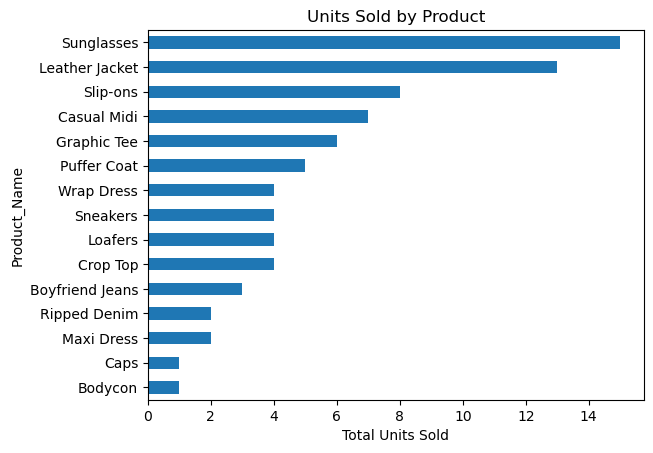

In [35]:
valid_sales.groupby("Product_Name")["Units_Sold"].sum().sort_values().plot(kind="barh")
plt.title("Units Sold by Product")
plt.xlabel("Total Units Sold")
plt.show()

### 13.2 Profit by Product

##### This plot focuses on total profit generated per product.  
##### Comparing it with the units-sold chart reveals which products are not just popular, but also truly profitable.

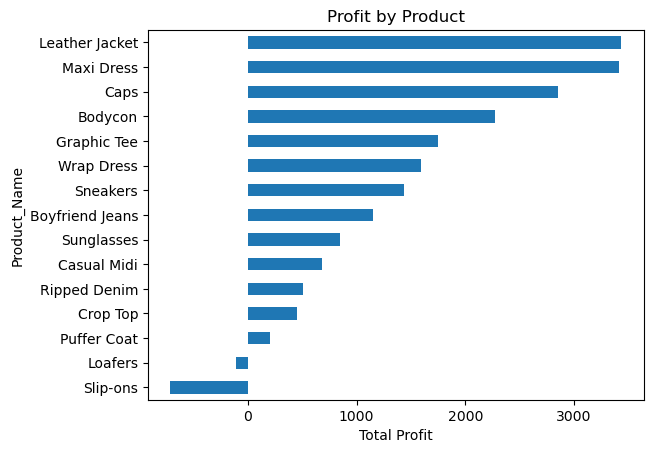

In [37]:
valid_sales.groupby("Product_Name")["Profit"].sum().sort_values().plot(kind="barh")
plt.title("Profit by Product")
plt.xlabel("Total Profit")
plt.show()

### 13.3 Monthly Revenue Trend

##### Here I aggregate `Sales_Amount` by `Month` to spot seasonal patterns – months with peak sales vs slow periods.

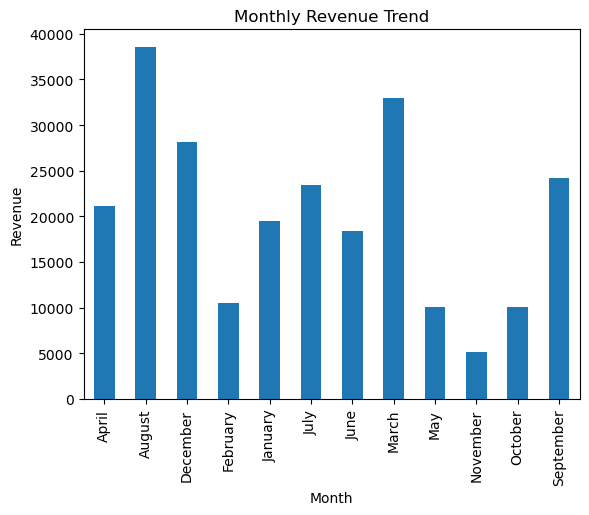

In [39]:
valid_sales.groupby("Month")["Sales_Amount"].sum().plot(kind="bar")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

### 13.4 Profit Contribution by Customer Segment

##### This pie chart shows how much profit comes from **B2B**, **B2C**, and **Unknown** segments, revealing which customer type drives the business.

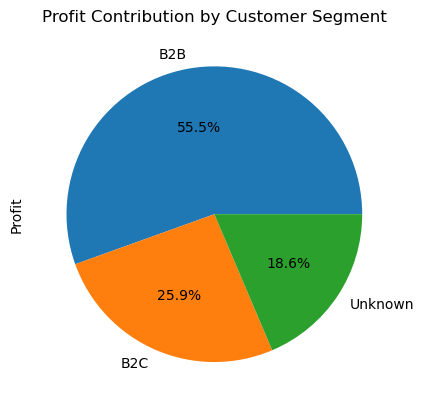

In [41]:
valid_sales.groupby("Segment")["Profit"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Profit Contribution by Customer Segment")
plt.show()

## 14. Conclusion

##### In this project I:
##### - Audited a messy retail sales dataset with heavy missing values.
##### - Recovered missing prices/quantities where logically possible.
##### - Split records into valid sales, refunds, and pending rows instead of forcing everything into one table.
##### - Built a clean `valid_sales` dataset with additional time and revenue features.
##### - Calculated KPIs and created visualizations to understand product performance, seasonality, and segment-wise profitability.
##### This cleaned dataset is now ready to be used for dashboards or further modeling.